In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

*Using Z scores*


In [ ]:
outliers=[]
  def detect_outliers(data):
        threshold=3
        mean=np.mean(data)
        std=np.std(data)
        
        for i in data:
            z_score=(i-mean)/std
            if np.abs(z_score)>threshold:
                outliers.append
        return outliers


*Using IQR*

In [21]:
quartile_1, quartile_3 =np.percentile(hotel['Aggregate rating'],[2.5,97.5])
iqr_value=quartile_3-quartile_1

In [22]:
lower_bound_value=abs(quartile_1-(iqr_value*1.5))
upper_bound_value=abs(quartile_3-(iqr_value*1.5))
print(lower_bound_value,upper_bound_value)

6.75 2.25


*Importing zomato file*

In [3]:
hotel= pd.read_csv('zomato.csv',sep=',',engine='python')

hotel.info()
hotel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
hotel.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
hotel.dropna(inplace=True)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu 

In [ ]:
_=plt.plot('Votes','Price Range',data=hotel,marker='.',linestyle='none')
_=plt.xlabel('Votes')
_=plt.ylabel('Price')
plt.show()

In [ ]:
_=sns.swarmplot(x='Price range',y='Votes',data=hotel)
_=plt.xlabel('Price')
_=plt.ylabel('Votes')
plt.show()

*Working on json file 1*

In [5]:
val=pd.read_json('file1.json')
val.head()


,results_found,restaurants,results_shown,results_start,message,code,status
0,17151.0,"[{'restaurant': {'has_online_delivery': 1, 'ph...",20.0,1.0,NaN,NaN,NaN
1,4748.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
2,13786.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
3,10224.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
4,7039.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN


In [6]:
val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   results_found  76 non-null     float64
 1   restaurants    76 non-null     object 
 2   results_shown  76 non-null     float64
 3   results_start  76 non-null     float64
 4   message        403 non-null    object 
 5   code           403 non-null    float64
 6   status         403 non-null    object 
dtypes: float64(4), object(3)
memory usage: 26.3+ KB


*Working on Json file 2*

In [7]:
val1=pd.read_json('file2.json')
val1.head()


,results_found,results_start,results_shown,restaurants
0,1263908,21,20,"[{'restaurant': {'R': {'res_id': 16668008}, 'a..."
1,1263908,21,20,"[{'restaurant': {'R': {'res_id': 16668008}, 'a..."
2,1263908,21,20,"[{'restaurant': {'R': {'res_id': 16668008}, 'a..."
3,1263908,21,20,"[{'restaurant': {'R': {'res_id': 16668008}, 'a..."
4,1263908,21,20,"[{'restaurant': {'R': {'res_id': 16668008}, 'a..."


In [8]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   results_found  550 non-null    int64 
 1   results_start  550 non-null    int64 
 2   results_shown  550 non-null    int64 
 3   restaurants    550 non-null    object
dtypes: int64(3), object(1)
memory usage: 17.3+ KB


*Working on Json file 3*

In [9]:
val2=pd.read_json('file3.json')
val2.head()


,results_found,results_start,results_shown,restaurants,code,status,message
0,1263908.0,41.0,20.0,"[{'restaurant': {'R': {'res_id': 2100702}, 'ap...",NaN,NaN,NaN
1,1263908.0,41.0,20.0,"[{'restaurant': {'R': {'res_id': 2100702}, 'ap...",NaN,NaN,NaN
2,1263908.0,41.0,20.0,"[{'restaurant': {'R': {'res_id': 2100702}, 'ap...",NaN,NaN,NaN
3,1263908.0,41.0,20.0,"[{'restaurant': {'R': {'res_id': 2100702}, 'ap...",NaN,NaN,NaN
4,1263908.0,41.0,20.0,"[{'restaurant': {'R': {'res_id': 2100702}, 'ap...",NaN,NaN,NaN


In [10]:
val2.isnull().sum()
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   results_found  452 non-null    float64
 1   results_start  452 non-null    float64
 2   results_shown  452 non-null    float64
 3   restaurants    452 non-null    object 
 4   code           98 non-null     float64
 5   status         98 non-null     object 
 6   message        98 non-null     object 
dtypes: float64(4), object(3)
memory usage: 30.2+ KB


*Working on Json file 4 *

In [3]:
val3=pd.read_json('file4.json')
val3.head()



,results_found,results_start,results_shown,restaurants
0,1263908,61,20,"[{'restaurant': {'R': {'res_id': 16604370}, 'a..."
1,1263908,61,20,"[{'restaurant': {'R': {'res_id': 16604370}, 'a..."
2,1263908,61,20,"[{'restaurant': {'R': {'res_id': 16604370}, 'a..."
3,1263908,61,20,"[{'restaurant': {'R': {'res_id': 16604370}, 'a..."
4,1263908,61,20,"[{'restaurant': {'R': {'res_id': 16604370}, 'a..."


In [4]:
val3.isnull().sum()
val3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   results_found  479 non-null    int64 
 1   results_start  479 non-null    int64 
 2   results_shown  479 non-null    int64 
 3   restaurants    479 non-null    object
dtypes: int64(3), object(1)
memory usage: 15.1+ KB


*Working on Json file 5*

In [5]:
val4=pd.read_json('file5.json')
val4.head()


,results_found,restaurants,results_shown,results_start,message,code,status
0,0.0,[],0.0,1.0,NaN,NaN,NaN
1,6835.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
2,0.0,[],0.0,1.0,NaN,NaN,NaN
3,0.0,[],0.0,1.0,NaN,NaN,NaN
4,8680.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN


In [6]:
val4.info()
val4.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   results_found  70 non-null     float64
 1   restaurants    70 non-null     object 
 2   results_shown  70 non-null     float64
 3   results_start  70 non-null     float64
 4   message        230 non-null    object 
 5   code           230 non-null    float64
 6   status         230 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


results_found    230
restaurants      230
results_shown    230
results_start    230
message           70
code              70
status            70
dtype: int64

*Importing Country file*

In [4]:
country_details=pd.read_excel('Country-Code.xlsx')
country_details

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
data1=pd.merge(hotel,country_details,on='Country Code')
data1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


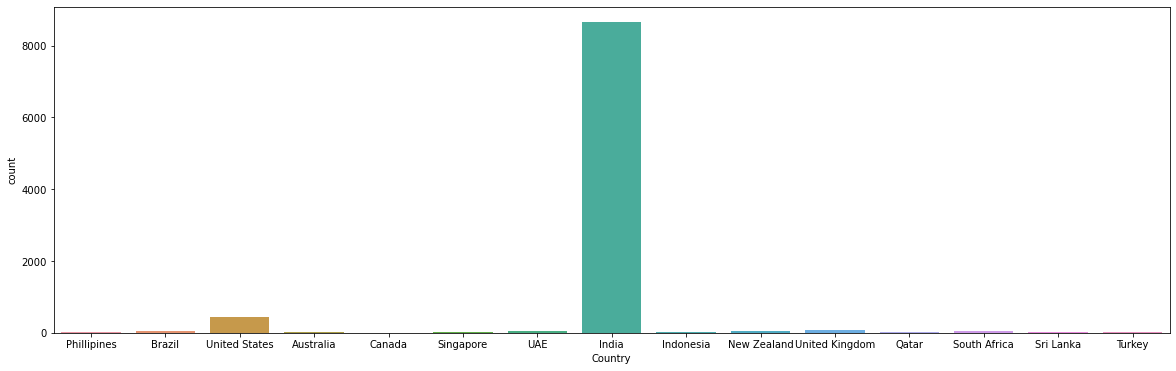

In [13]:
_=plt.subplots(1,1,figsize=(20,6))
_=sns.countplot(data1['Country'])
plt.show()

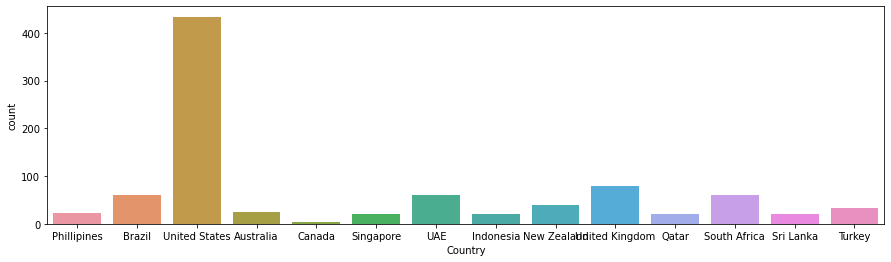

In [14]:
_=plt.subplots(1,1,figsize=(15,4))
_=sns.countplot(data1[data1.Country!='India']['Country'])
plt.show()
               